### Unidad II. Regresiones y reducción de dimensionalidad.

## Regresión Lineal Múltiple por el método de los Mínimos Cuadrados.

- Examen de los residuos. Prueba de normalidad de los residuales. 
- Prueba de homogeneidad de varianza. 
- Mínimos Cuadrados Ponderados. 
- Observaciones extremas. 
- Búsqueda de la mejor ecuación de regresión. Stepwise regression

### Regresión Lineal Múltiple

In [1]:
k = 2  # variables independientes
N = 10 # observaciones

10

In [2]:
X = rand(N, k) # simulación: valores observados para las variables independientes

10x2 Array{Float64,2}:
 0.81579   0.995322 
 0.278731  0.0282361
 0.48045   0.380756 
 0.461093  0.173802 
 0.5591    0.154985 
 0.942583  0.373553 
 0.379823  0.191148 
 0.850074  0.761619 
 0.704299  0.191507 
 0.17188   0.4537   

In [3]:
α = rand() # simulación: valor real de la intersección

0.8560936140148967

In [4]:
β = rand(k) # simulación: valores reales de los coeficientes

2-element Array{Float64,1}:
 0.763408
 0.13545 

In [5]:
E = 0.1 .* rand(N) # simulación: agrega errores al azar al modelo

10-element Array{Float64,1}:
 0.0277966
 0.019319 
 0.0942902
 0.0297284
 0.085972 
 0.0880551
 0.0466095
 0.0350374
 0.0363632
 0.0937151

In [6]:
Y = α + X * β + E # valores para la variable dependiente con el modelo lineal que acabamos de armar

10-element Array{Float64,1}:
 1.64149
 1.09202
 1.36874
 1.26137
 1.38988
 1.71432
 1.21855
 1.64325
 1.45606
 1.14248

La biblioteca [**MultivariateStats**](https://github.com/JuliaStats/MultivariateStats.jl) de Julia
implementa la regresión lineal por cuadrados mínimos en su función `llsq`. Este método toma la matriz de valores de la variable dependiente y el vector de la independiente. Retorna un vector de la forma $[\beta_{1}, …, \beta_{k}, \alpha]$.

In [7]:
using MultivariateStats

predicción = llsq(X, Y)

3-element Array{Float64,1}:
 0.753239
 0.132963
 0.918443

In [8]:
αₚ = predicción[end] # valor de la intersección del ajuste

0.9184430434775053

In [9]:
βₚ = predicción[1:end-1] # valores de los coeficientes del ajuste

2-element Array{Float64,1}:
 0.753239
 0.132963

In [10]:
Yₚ = αₚ + X*βₚ # valores predichos para la variable dependiente

10-element Array{Float64,1}:
 1.66527
 1.13215
 1.33096
 1.28887
 1.36019
 1.6781 
 1.22996
 1.66002
 1.47441
 1.10824

Diferencias entre los valores reales y los ajustados

In [11]:
α - αₚ

-0.062349429462608574

In [12]:
β - βₚ

2-element Array{Float64,1}:
 0.0101693
 0.0024872

In [13]:
Eₚ = Y - Yₚ # son los valores residuales de la regresión

10-element Array{Float64,1}:
 -0.0237812
 -0.0401258
  0.0377736
 -0.0274998
  0.0296937
  0.0362201
 -0.011402 
 -0.0167731
 -0.0183477
  0.0342421

[Plots.jl] Initializing backend: pyplot



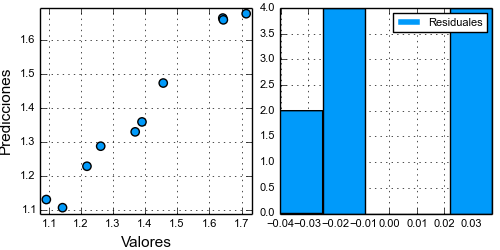

In [14]:
using Plots
pyplot(size=(500,250))

plot(
scatter(Y, Yₚ, legend=false, 
        xlab="Valores", ylab="Predicciones"),
histogram(Eₚ, label="Residuales", bins=5)
)

### Análisis de regresión

[**Supuestos**](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm), muchos de los cuales aplican a los residuos:  

- **Linealidad**: Si no se cumple se comete un error de <a href="https://en.wikipedia.org/wiki/Specification_(regression)">especificación</a>, dado que el modelo será incorrecto. En el caso de una o dos variables independientes, ayuda observar un gráfico de dispersión en busca de una tendencia lineal (línea, plano).   
- **Independencia de los residuos**: Los residuos no deben estar correlacionados (deben ser una variable aleatoria), algo que puede suceder cuando se trabaja con series temporales. El [estadístico de Durbin-Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) puede ayudar en la detección de autocorrelaciones.  
- **Homocedasticidad**: Igualdad de varianza para cada valor o grupo de valores de la/s variable/s independiente/s  
- **Normalidad**: Para cada valor o grupo de valores de la/s variable/s independiente/s los residuos se distribuyen de manera normal con $\mu = 0$   
- **No-colinealidad**: Las variables independientes no pueden ser combinaciones lineales unas de otras, no debe haber correlación entre ellas.   

In [15]:
using GLM

In [16]:
Xₐ = hcat(ones(N), X) # Y = 1*α + β₁X₁ + β₂X₂ + ...

10x3 Array{Float64,2}:
 1.0  0.81579   0.995322 
 1.0  0.278731  0.0282361
 1.0  0.48045   0.380756 
 1.0  0.461093  0.173802 
 1.0  0.5591    0.154985 
 1.0  0.942583  0.373553 
 1.0  0.379823  0.191148 
 1.0  0.850074  0.761619 
 1.0  0.704299  0.191507 
 1.0  0.17188   0.4537   

In [17]:
modelo = lm(Xₐ,Y)

GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}}:

Coefficients:
     Estimate Std.Error t value Pr(>|t|)
x1   0.918443 0.0277568 33.0889    <1e-8
x2   0.753239 0.0528756 14.2455    <1e-5
x3   0.132963 0.0451223 2.94673   0.0215



In [18]:
residuos = residuals(modelo)

10-element Array{Float64,1}:
 -0.0237812
 -0.0401258
  0.0377736
 -0.0274998
  0.0296937
  0.0362201
 -0.011402 
 -0.0167731
 -0.0183477
  0.0342421

### Mínimos Cuadrados Ponderados.

En el caso de no cumplirse con la homocedacia, es posible darle a cada observación un peso inversamente proporcional a la varianza para ese valor o grupo de valores de la/s variable/s independiente/s en una regresion por [minimos cuadrados ponderados](https://en.wikipedia.org/wiki/Least_squares#Weighted_least_squares). Lo óptimo es conocer de antemano cual es la varianza de cada medición. Por ejemplo si medimos cada dato con una herramienta diferente y conocemos su error. Sino existen maneras de determinar los posibles valores de la varianza (o de un estimador robusto correlacionado con ésta) con respecto a las variables independientes.  

In [19]:
using DataFrames

In [20]:
N = 100
X = rand(N)
β = rand()
α = 5

E = rand(Normal(1,0.5),N) .* X # heterocedasticidad

Y = α + X * β + E

datos = DataFrame(hcat(X, Y))
names!(datos, [:X, :Y])

,X,Y
1,0.8354443162960048,6.0504188633832365
2,0.47839841022032314,5.041046443163276
3,0.352781701852501,5.512202012648103
4,0.937588526813286,5.972344543251144
5,0.8933644926809343,5.690320017739361
6,0.44519156848596464,5.568563086118854
7,0.2169172288611776,5.09548371342323
8,0.7471375064532673,5.803659848585297
9,0.6679409282097368,5.4562434562582185
10,0.1154692520513323,5.196278621918961


In [21]:
modelo = glm(Y ~ X, datos, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}

Formula: Y ~ 1 + X

Coefficients:
             Estimate Std.Error z value Pr(>|z|)
(Intercept)   5.02694 0.0471757 106.558   <1e-99
X             1.02037 0.0864782 11.7992   <1e-31


In [22]:
coeficientes = coef(modelo)

2-element Array{Float64,1}:
 5.02694
 1.02037


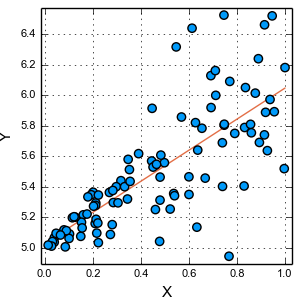

In [23]:
pyplot(size=(300,300))

scatter(datos, :X, :Y, legend=false)
Plots.abline!(coeficientes[2], coeficientes[1])

In [24]:
residuos = Y - predict(modelo)

100-element Array{Float64,1}:
  0.171012  
 -0.474042  
  0.12529   
 -0.0112876 
 -0.248187  
  0.0873583 
 -0.152797  
  0.0143583 
 -0.252248  
  0.0515128 
 -0.0830575 
 -0.174494  
  0.39615   
  ⋮         
  0.502009  
 -0.025598  
  0.246145  
  0.0451442 
 -0.335798  
 -0.162787  
 -0.24721   
  0.0449409 
 -0.00775898
 -0.1506    
 -0.237551  
 -0.0114418 


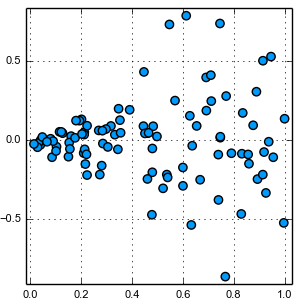

In [25]:
scatter(X, residuos, legend=false)

In [26]:
residuos_modelo = DataFrame(
x = collect(0:0.05:0.8).+0.1, # inicio + paso/2 = centro de la ventana
y = Float64[ mad( residuos[i .<= X .<= i+0.2] ) for i in collect(0:0.05:0.8) ] # paso = 0.2
)

,x,y
1,0.1,0.04720231531500852
2,0.15000000000000002,0.07787225237424426
3,0.2,0.09852661888920018
4,0.25,0.10890268409725458
5,0.30000000000000004,0.12568337368722918
6,0.35,0.10971374006712621
7,0.4,0.12175935291181769
8,0.44999999999999996,0.18168516745710908
9,0.5,0.33677830190194463
10,0.55,0.27154420943986995


In [27]:
modelo = glm(y ~ x, residuos_modelo, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}

Formula: y ~ 1 + x

Coefficients:
              Estimate Std.Error  z value Pr(>|z|)
(Intercept)  0.0310143   0.03287 0.943544   0.3454
x             0.368762 0.0590362  6.24637    <1e-9



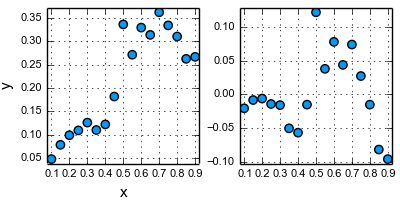

In [28]:
plot(
scatter(residuos_modelo, :x,:y),
scatter(residuos_modelo[:x],residuos_modelo[:y]-predict(modelo)),
legend=false, size=(400,200))

In [29]:
C = coef(modelo)

2-element Array{Float64,1}:
 0.0310143
 0.368762 

In [30]:
pesos = Float64[ 1/(C[1] + C[2]*x) for x in datos[:X] ]

100-element Array{Float64,1}:
  2.94903
  4.82092
  6.20707
  2.6542 
  2.77429
  5.12337
  9.0086 
  3.26232
  3.60587
 13.5879 
  9.21029
  3.96271
  3.49599
  ⋮      
  2.71477
 27.4064 
  3.40709
  6.16851
  2.68332
  7.4244 
  4.97594
  4.93455
 15.5439 
  2.87251
  4.34291
 18.0693 

In [31]:
lineal_ponderada = glm(Y ~ X, datos, Normal(), IdentityLink(), wts=pesos)

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}

Formula: Y ~ 1 + X

Coefficients:
             Estimate  Std.Error z value Pr(>|z|)
(Intercept)   5.01442 0.00976967 513.264   <1e-99
X             1.04756  0.0257271  40.718   <1e-99



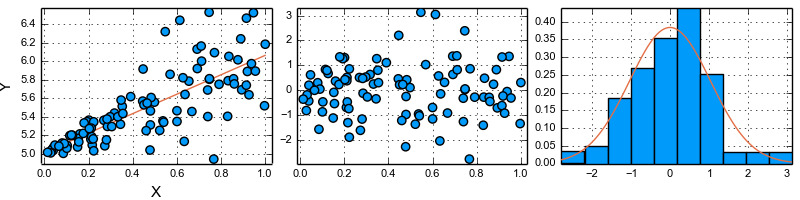

In [32]:
reg_plot = scatter(datos, :X, :Y)
Plots.abline!(reg_plot, coef(lineal_ponderada)[2], coef(lineal_ponderada)[1])

residuos = ( datos[:Y] - predict(lineal_ponderada) ) .* pesos

normal = Normal(0,std(residuos))

res_plot = histogram(residuos, bins=10, normed=true)
plot!(res_plot, res -> pdf(normal, res), minimum(residuos), maximum(residuos))

res_scatter = scatter(datos[:X], residuos)

plot(reg_plot, res_scatter, res_plot, legend=false, size=(800,200), layout=grid(1,3))

En general es preferible usar pesos cuando éstos se conocen de antemano. Por ejemplo si se conoce el error experimental de los instrumentos, B factors o resolución en estructuras cristalográficas, etc.  Tratar de encontrar pesos puede ser complicado. En este caso, los pesos hacen que los residuales ponderados cumplan homocedacia, pero quizás a costa de la normalidad.

### Ridge Regression 

[Ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) en [MultivariateStats](http://multivariatestatsjl.readthedocs.io/en/latest/lreg.html#ridge-regression) y [en ScikitLearn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression).  
Esta regresión es mucho más robusta a la presencia de variables explicativas correlacionadas (colineales).

*Ridge Regression* usando **ScikitLearn.jl**, el valor de α es seleccionado usando *validación cruzada*:

In [33]:
k = 3  # variables independientes
@assert k > 2
N = 10 # observaciones
X = rand(N, k) # simulación: valores observados para las variables independientes
X[:,1] = X[:,1].*X[:,2] + X[:,1] # colineales
α = rand() # simulación: valor real de la intersección
β = rand(k) # simulación: valores reales de los coeficientes
E = 0.1 .* rand(N) # simulación: agrega errores al azar al modelo
Y = α + X * β + E # valores para la variable dependiente con el modelo lineal que acabamos de armar

10-element Array{Float64,1}:
 1.16531
 2.23758
 1.951  
 1.27621
 2.23972
 1.9664 
 2.26546
 2.24364
 2.73325
 1.68982

In [34]:
using ScikitLearn
@sk_import linear_model: RidgeCV

In [35]:
rcv = RidgeCV(alphas=0.01:0.01:10.0)

PyObject RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0....9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
    cv=None, fit_intercept=True, gcv_mode=None, loss_func=None,
    normalize=False, score_func=None, scoring=None, store_cv_values=False)

In [36]:
ScikitLearn.fit!(rcv, X, Y)

PyObject RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0....9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
    cv=None, fit_intercept=True, gcv_mode=None, loss_func=None,
    normalize=False, score_func=None, scoring=None, store_cv_values=False)

In [37]:
rcv[:coef_]

3-element Array{Float64,1}:
 0.861269
 0.610195
 0.735451

In [38]:
rcv[:intercept_]

0.6011371318183596

In [39]:
α = rcv[:alpha_]

0.01

*Ridge Regression* usando **ScikitLearn.jl**:

In [40]:
@sk_import linear_model: Ridge

In [41]:
r = Ridge(alpha = α)

PyObject Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [42]:
ScikitLearn.fit!(r, X, Y)

PyObject Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [43]:
r[:coef_]

3-element Array{Float64,1}:
 0.861269
 0.610195
 0.735451

In [44]:
rcv[:intercept_]

0.6011371318183596

*Ridge Regression* usando **MultivariateStats**:

In [45]:
MultivariateStats.ridge(X, Y, α)

4-element Array{Float64,1}:
 0.861269
 0.610195
 0.735451
 0.601137

*Ridge Regression* usando **R** and **RCall**:

In [46]:
using RCall

a = α

R"""
library(MASS)
lmr <- lm.ridge($Y ~ $X, lambda=$a)
"""

RCall.RObject{RCall.VecSxp}
           `#JL`$X1  `#JL`$X2  `#JL`$X3 
0.5775352 0.8661207 0.6396501 0.7465127 
